<a href="https://colab.research.google.com/github/Javsk891/proyecto-integrador-2/blob/main/ModeloARIMA_PM2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo ARIMA para forecasting de PM2.5 en la ciudad de Medellín (El volador)

En el contexto de la gestión de la calidad del aire, la predicción precisa de las concentraciones de contaminantes atmosféricos es fundamental para la toma de decisiones informadas y la implementación de políticas efectivas de control de la contaminación. Uno de los contaminantes más preocupantes debido a sus efectos adversos en la salud humana es el material particulado fino, conocido como PM2.5.

En este estudio, nos enfocamos en la predicción de las concentraciones de PM2.5 en la ciudad de Medellín, Colombia, utilizando el modelo autoregresivo integrado de media móvil (ARIMA). Medellín, una ciudad con una topografía compleja y una densa población, enfrenta desafíos significativos en términos de calidad del aire, lo que hace que la predicción precisa de PM2.5 sea crucial para la salud pública y la planificación urbana.

Las mediciones de PM2.5 se han obtenido de la estación de monitoreo El Volador, una ubicación estratégica que proporciona datos representativos de la calidad del aire en la ciudad. Utilizando técnicas de modelado como ARIMA, buscamos aprovechar la información histórica de las concentraciones de PM2.5 para realizar predicciones futuras con el objetivo de ayudar a las autoridades locales, los investigadores y la comunidad en general a tomar medidas proactivas para mitigar los impactos negativos en la salud y el medio ambiente asociados con la contaminación del aire.

#El modelo ARIMA

El modelo autoregresivo integrado de media móvil (ARIMA) es una herramienta poderosa en el análisis de series temporales que se utiliza para predecir valores futuros en función de datos históricos. La utilidad del ARIMA radica en su capacidad para capturar y modelar patrones complejos en los datos de series temporales, lo que lo hace especialmente útil para el pronóstico o forecasting.

La metodología ARIMA se basa en tres componentes principales:

*   Componente autoregresivo (AR): Este componente utiliza la relación entre las observaciones pasadas y las actuales para hacer predicciones. Se refiere a la regresión de la variable en función de sus valores pasados. En un modelo ARIMA(p, d, q), el término autoregresivo de orden p (AR(p)) representa la regresión de la serie temporal en función de sus p valores anteriores.

*   Componente de media móvil (MA): Este componente modela la relación entre un valor y un término de error residual de observaciones pasadas. En un modelo ARIMA(p, d, q), el término de media móvil de orden q (MA(q)) representa la dependencia entre una observación y un error residual de las q observaciones anteriores.

*  Componente de diferenciación (I): Este componente se utiliza para estacionarizar la serie temporal, es decir, hacer que la serie sea estacionaria eliminando cualquier tendencia o estacionalidad presente en los datos. La diferenciación se realiza mediante la diferencia de observaciones consecutivas a fin de lograr una serie temporal estacionaria. El orden de diferenciación se denota como d en un modelo ARIMA(p, d, q).

El modelo ARIMA combina estos tres componentes para modelar una serie temporal. La selección de los parámetros p, d y q se realiza mediante técnicas como la inspección visual de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF), así como métodos de búsqueda automatizados.

La utilidad del ARIMA en forecasting radica en su capacidad para capturar la estructura temporal y las relaciones entre observaciones pasadas para hacer predicciones futuras. Al modelar estas relaciones de manera adecuada, el ARIMA puede proporcionar pronósticos precisos y útiles para una amplia gama de aplicaciones, incluidas las series temporales de calidad del aire como las concentraciones de PM2.5.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import os

# Instalar la librería sgt
!pip install sgt
import sgt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Habilitar la visualización de gráficos en línea
%matplotlib inline

# Aumentar el tamaño predeterminado de las figuras
rcParams['figure.figsize'] = 22, 10

# Importar las librerías necesarias para el modelo ARIMA
from pandas import Series
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Imprimir el contenido del directorio de trabajo actual
print(os.listdir("/content"))

['.config', 'sample_data']


In [ ]:
# Importar librerías para acceder a datos desde Google Colab
from google.colab import drive

# Montar Google Drive en el entorno de Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir el dataset con el que se va a trabajar
df = pd.read_csv('/content/drive/My Drive/volador_ventana.csv')

In [ ]:
# Seleccionamos las columnas 'Fecha' y 'PM2.5' para crear la serie de tiempo con la que se va a realizar el análisis
df = df[['Fecha', 'PM2.5']]

In [ ]:
# Convertir la columna 'Fecha' a formato datetime si no lo está
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna 'Fecha' como índice
df.set_index('Fecha', inplace=True)

In [ ]:
# Seleccionar datos entre 2013 y 2018
df = df['2013-01-01 00:00:00':'2015-12-31 23:00:00']

In [ ]:
# Convertir la columna 'PM2.5' a una serie de tiempo
data1 = pd.Series(df['PM2.5'])

# Obtener los índices del DataFrame (que son las fechas) y convertirlos a formato datetime
data2 = pd.to_datetime(df.index)

#Una breve exploración de los datos

Es importante visualizar la variable PM2.5 como serie de tiempo porque nos permite comprender su comportamiento a lo largo del tiempo y detectar patrones, tendencias y estacionalidades que pueden no ser evidentes en un análisis estático. Al representar los datos de PM2.5 en forma de serie temporal, podemos identificar cambios en los niveles de contaminación a lo largo del día, la semana o el año, así como eventos específicos que puedan influir en la calidad del aire, como picos de contaminación durante horas pico de tráfico o fenómenos meteorológicos extremos.

Text(0.5, 1.0, 'Serie de tiempo PM2.5')

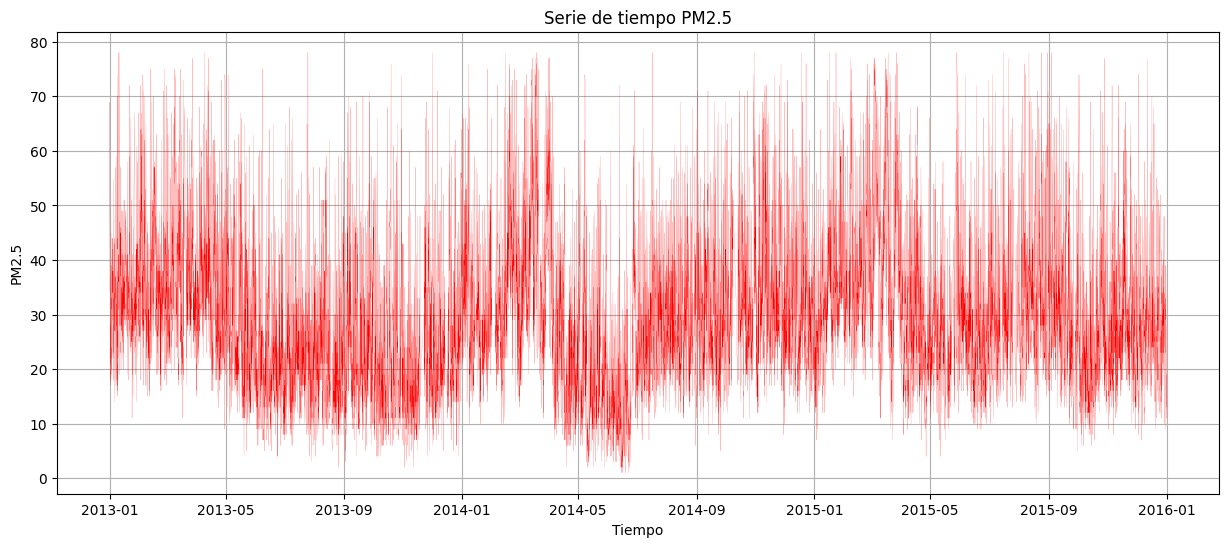

In [ ]:
# Crear una figura de tamaño 15x6
plt.figure(figsize=(15,6))

# Graficar los datos del DataFrame con línea roja y ancho de línea 0.09
plt.plot(df, color='r', linewidth=0.09)

# Agregar título y etiquetas al gráfico
plt.title('Gráfico original')
plt.xlabel('Tiempo')
plt.ylabel('PM2.5')

# Mostrar la cuadrícula en el gráfico
plt.grid(True)
plt.title('Serie de tiempo PM2.5')


#Media Movil

La media móvil es importante en este proceso porque ayuda a identificar estacionariedad en los datos. Al suavizar las fluctuaciones aleatorias, la media móvil puede revelar patrones de comportamiento que indican si la serie temporal exhibe estacionariedad, es decir, si la media y la varianza de la serie son constantes a lo largo del tiempo. Esto es crucial para el análisis de series temporales y el modelado de datos, ya que la estacionariedad es un requisito común para muchos modelos estadísticos y de predicción. La identificación de estacionariedad proporciona una base sólida para la construcción de modelos precisos y confiables.

In [ ]:
# Calcula la media móvil con una ventana de 4 periodos
rolling_mean = data1.rolling(4).mean()

# Calcula la desviación estándar móvil con una ventana de 4 periodos
rolling_std = data1.rolling(4).std()

# Muestra las primeras filas de la desviación estándar móvil
rolling_std.head()

Fecha
2013-01-01 00:00:00          NaN
2013-01-01 01:00:00          NaN
2013-01-01 02:00:00          NaN
2013-01-01 03:00:00    15.416441
2013-01-01 04:00:00     8.655441
Name: PM2.5, dtype: float64

# Descomposición estacional

La descomposición estacional divide una serie temporal en sus componentes básicas: tendencia, estacionalidad y residuo. Después de la descomposición, trazar las componentes descompuestas junto con la serie original permite visualizar patrones, tendencias y ciclos estacionales en los datos, facilitando la comprensión de la estructura temporal y la evaluación del modelo.

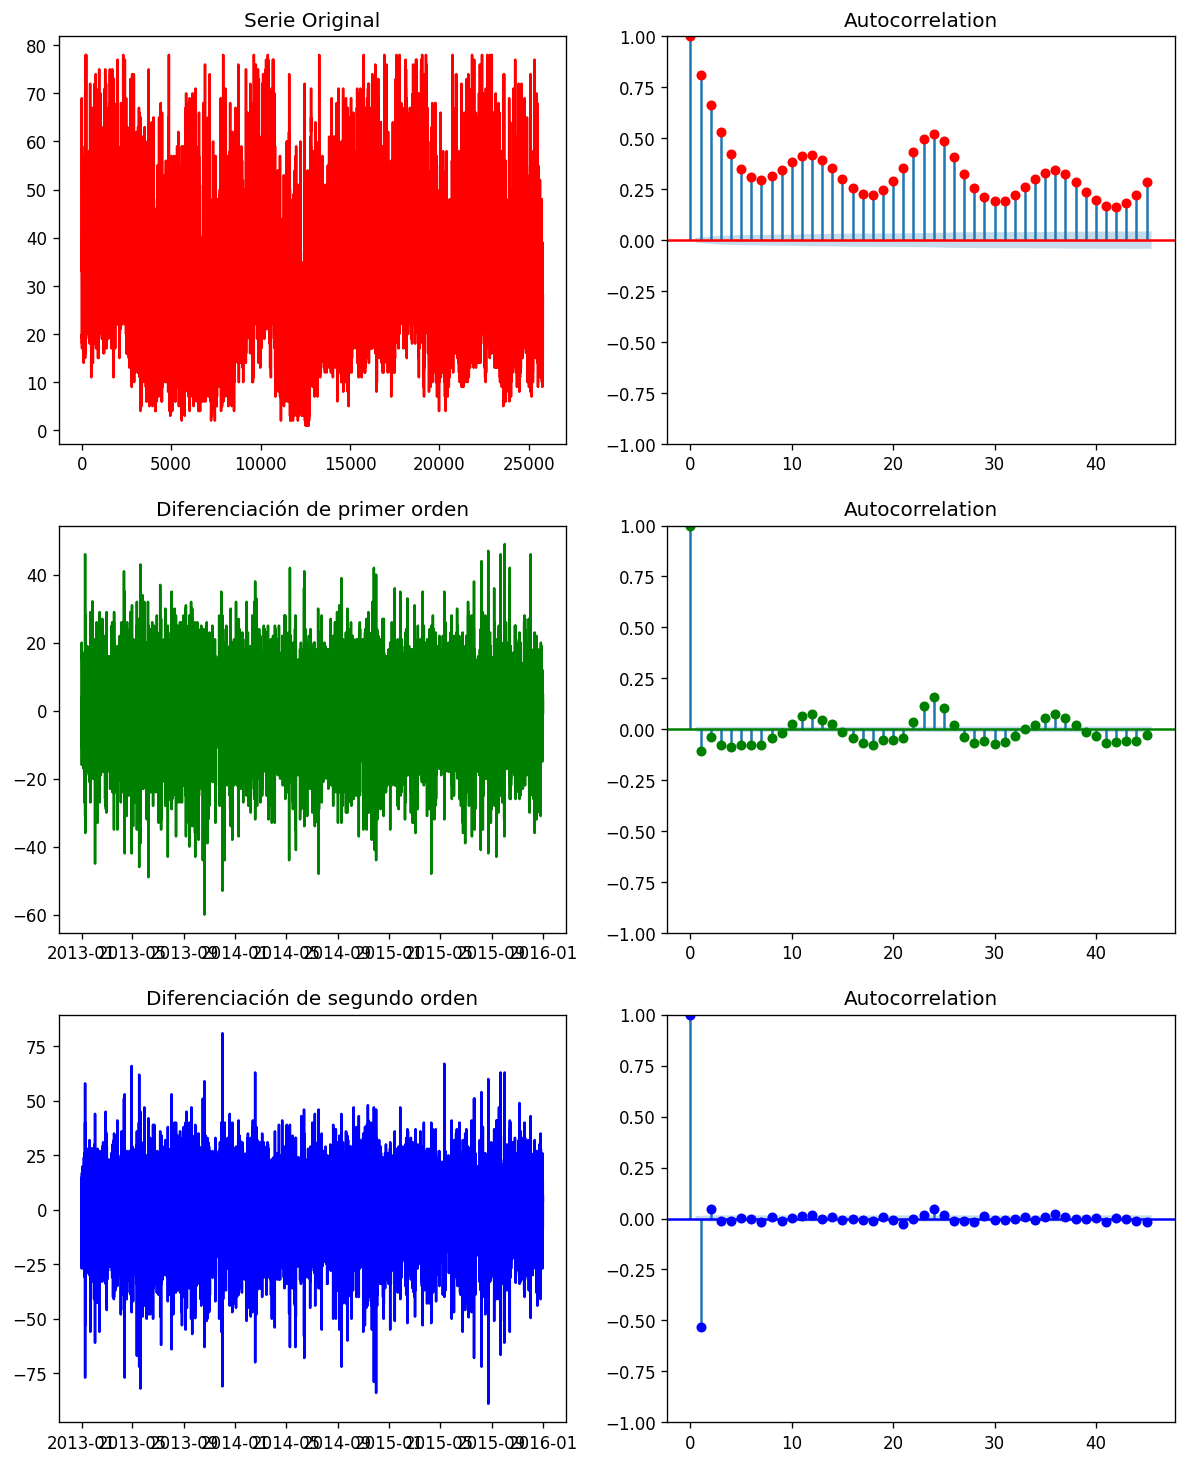

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})

# Serie original
fig, axes = plt.subplots(3,2, sharex=False)
axes[0,0].plot(df.values,color='r'); axes[0,0].set_title('Serie Original')
plot_acf(df['PM2.5'], ax=axes[0,1], color='r')

# Primera diferenciación
axes[1,0].plot(df['PM2.5'].diff(), color='g'); axes[1,0].set_title('Diferenciación de primer orden')
plot_acf(df['PM2.5'].diff().dropna(), ax=axes[1,1], color='g')

# Segunda diferenciación
axes[2,0].plot(df['PM2.5'].diff().diff(), color='b'); axes[2,0].set_title('Diferenciación de segundo orden')
plot_acf(df['PM2.5'].diff().diff().dropna(), ax=axes[2,1], color='b')

plt.show()

# Dickey fuller para primera diferenciación

In [ ]:
# Segunda prueba utilizando los datos después de aplicar primera diferenciación
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Realiza la prueba de Dickey-Fuller aumentada (ADF) para comprobar la estacionariedad
result = adfuller(df['PM2.5'].diff().dropna())  # Diferencia los datos y elimina los NaN

# Imprime los resultados de la prueba ADF
print('Estadística ADF: %f' % result[0])
print('Valor-p: %f' % result[1])

Estadística ADF: -32.430239
Valor-p: 0.000000


In [ ]:
# Segunda prueba utilizando los datos después de aplicar dos veces la diferenciación
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Realiza la prueba de Dickey-Fuller aumentada (ADF) para comprobar la estacionariedad
# Se aplica la diferenciación dos veces y se eliminan los valores NaN antes de realizar la prueba
result = adfuller(df['PM2.5'].diff().diff().dropna())

# Imprime los resultados de la prueba ADF
print('Estadística ADF: %f' % result[0])
print('Valor-p: %f' % result[1])

Estadística ADF: -48.870718
Valor-p: 0.000000


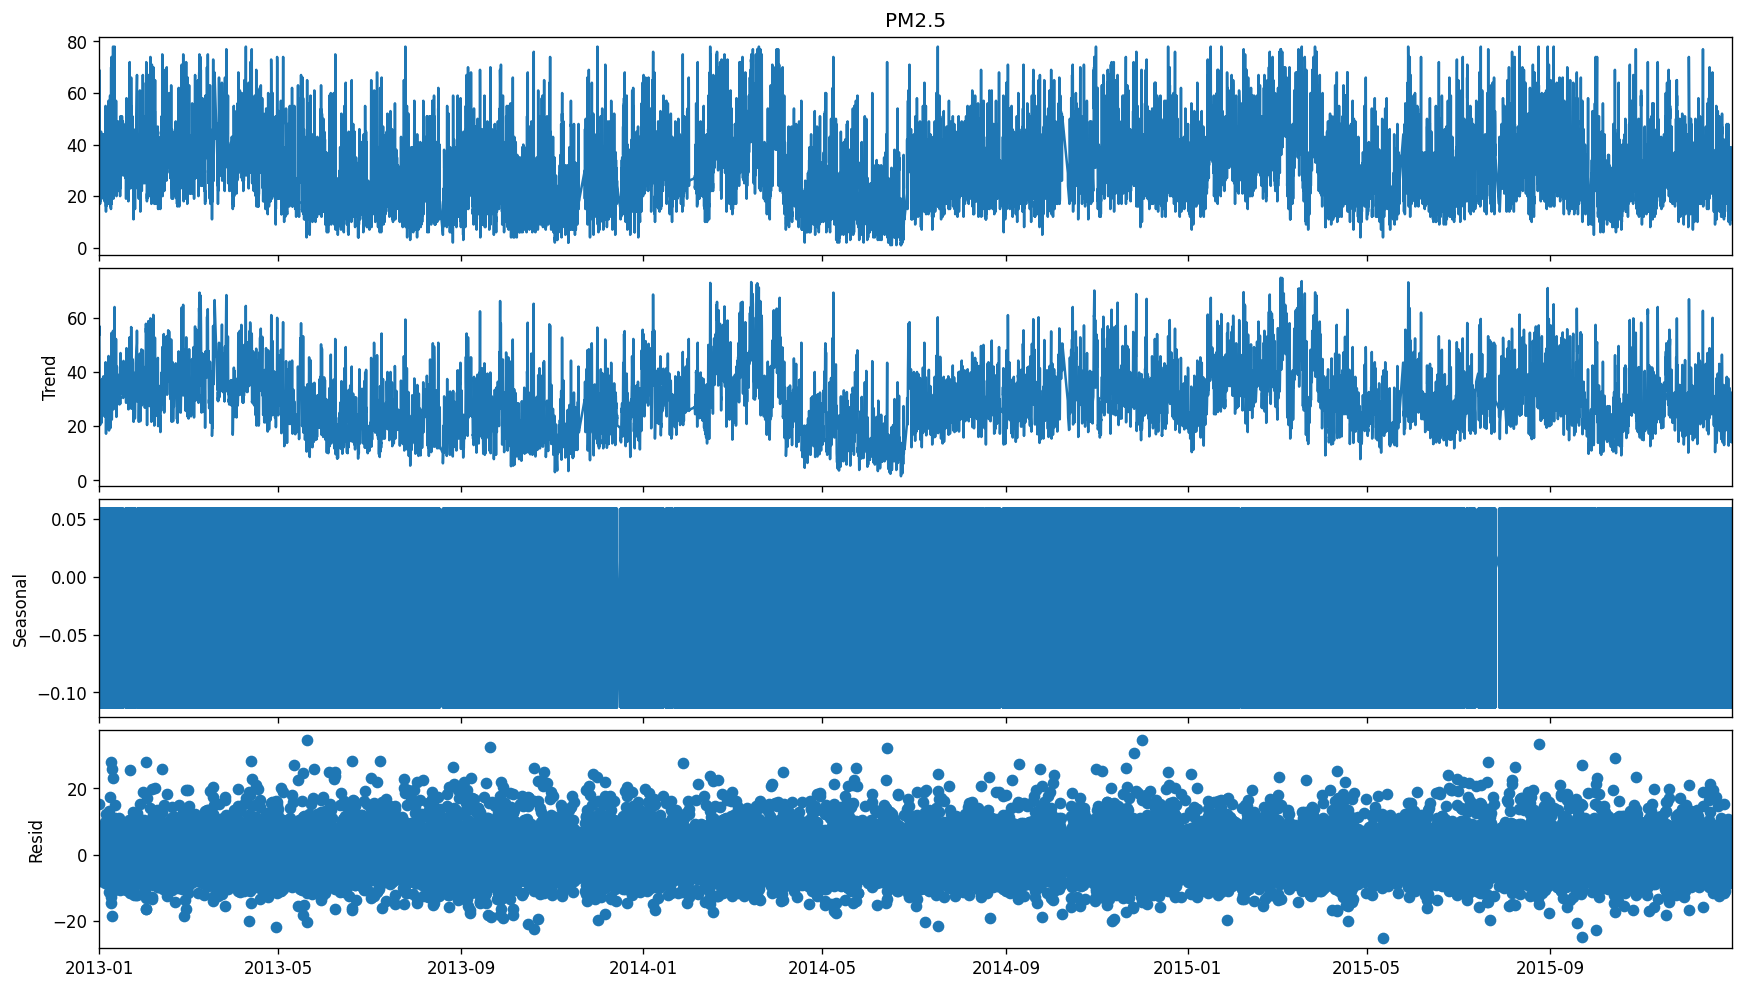

In [ ]:
# Descomposición estacional con un período establecido en 5
decomp = sm.tsa.seasonal_decompose(data1, period=5)

# Trazar los componentes de la descomposición
fig = decomp.plot()
fig.set_size_inches(15, 8)
plt.show()


In [ ]:
# Función para graficar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF)
def plot_acf_pacf(series):
    # Configura el tamaño de la figura para las gráficas
    plt.rcParams["figure.figsize"] = 18, 5

    # Crea una figura y un arreglo de ejes con 2 subplots
    fig, axes = plt.subplots(1, 2)

    # Graficar la función de autocorrelación (ACF)
    sgt.plot_acf(series, zero=False, lags=40, ax=axes[0])
    # Graficar la función de autocorrelación parcial (PACF)
    sgt.plot_pacf(series, zero=False, lags=40, ax=axes[1])

    # Mostrar las gráficas
    plt.show()

In [ ]:
# Realizar la prueba de Dickey-Fuller aumentada para determinar la estacionariedad de la serie de PM2.5
result = adfuller(df['PM2.5'])

# Imprimir los resultados de la prueba ADF
print('Estadística ADF:', result[0])
print('Valor-p:', result[1])
print('Valores Críticos:', result[4])

# Evaluar el valor-p para determinar la estacionariedad
if result[1] <= 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

Estadística ADF: -10.525932928914482
Valor-p: 9.417862999970751e-19
Valores Críticos: {'1%': -3.430604087271533, '5%': -2.8616522990231905, '10%': -2.566829773461828}
La serie es estacionaria.


La serie es estacionaria desde la primera diferenciación

La autocorrelación parcial se puede interpretar como la correalción entre la serie y su rezago, despues de excluir las contribuciones de los rezagos intermedios. Transmite la correlación pura ente el rezago y la serie

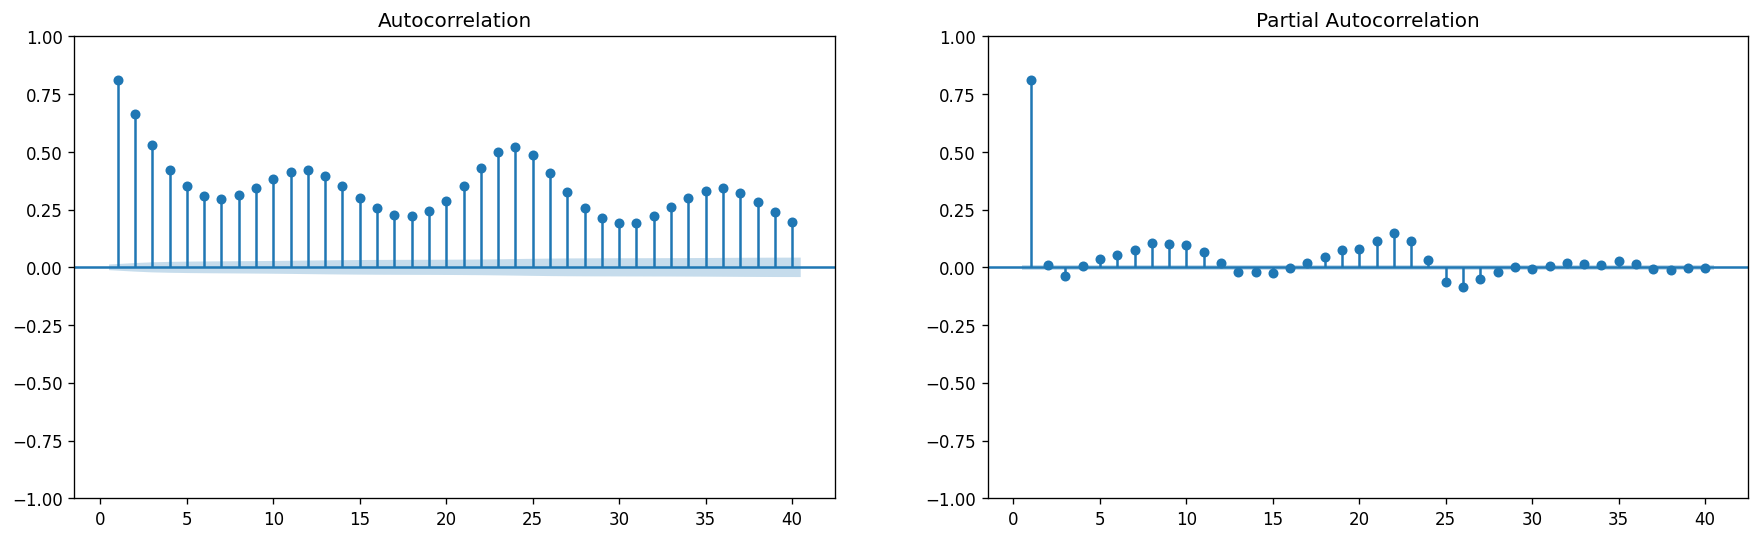

In [ ]:
# Llama a la función plot_acf_pacf para visualizar la autocorrelación y la autocorrelación parcial
# de la serie temporal de PM2.5
plot_acf_pacf(df['PM2.5'])

In [ ]:
# Transformar el dataset para contener solo una columna
#pollution = df.set_index(date_hour)#set index equal to datetime
pollution = df[["PM2.5"]] #transform dataset in only one column

#transform zero value in NaN and after delete it
#pollution = pollution.replace(0, pd.np.nan)
#pollution = pollution.dropna()

print(pollution.head(3)) #print first 3 rows

                     PM2.5
Fecha                     
2013-01-01 00:00:00   34.0
2013-01-01 01:00:00   49.0
2013-01-01 02:00:00   69.0


In [ ]:
df.head()

,PM2.5
Fecha,
2013-01-01 00:00:00,34.0
2013-01-01 01:00:00,49.0
2013-01-01 02:00:00,69.0
2013-01-01 03:00:00,62.0
2013-01-01 04:00:00,55.0


ARIMA MODEL
One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series. There are three distinct integers (p, d, q) that are used to parametrize ARIMA models:
p(AR) is the auto-regressive(AR) part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
d(I) is the integrated(I) part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
q(MA) is the moving average(MA) part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

I develop a method to search ARIMA hyperparameters for a one-step rolling forecast. The approach is broken down into two parts:

Evaluate an ARIMA model.
Evaluate sets of ARIMA parameters.

In [ ]:
# Función para evaluar el modelo ARIMA
def evaluate_arima_model(X, arima_order):
    # Preparar el conjunto de datos de entrenamiento
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]  # Dividir la serie en 70% entrenamiento y 30% prueba
    history = [x for x in train]

    # Hacer predicciones
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)  # Llamar a ARIMA
        model_fit = model.fit(disp=0)  # Ajustar el modelo sin mostrar la salida
        yhat = model_fit.forecast()[0]  # Predecir el siguiente punto
        predictions.append(yhat)
        history.append(test[t])  # Añadir el punto de prueba actual al historial para la próxima iteración

    # Calcular el error fuera de muestra
    mse = mean_squared_error(test, predictions)

    # Redondear las predicciones y los valores de prueba para calcular la precisión
    test_rounded = round(pd.Series((v[0] for v in test)))
    predictions_rounded = round(pd.Series((v[0] for v in predictions)))
    accuracy = accuracy_score(test_rounded, predictions_rounded)

    # Organizar los resultados en un diccionario para su retorno
    result = {
        'model_fit': model_fit,
        'mse': mse,
        'predictions': predictions,
        'test': test,
        'train': train,
        'accuracy': accuracy
    }

    return result

In [ ]:
# Evaluar combinaciones de valores p, d y q para un modelo ARIMA
def evaluate_models(df, p_values, d_values, q_values):
    dataset = df.astype('float32')  # Convertir el dataframe a float32 para el procesamiento
    best_score, best_cfg = float("inf"), None  # Inicializar la mejor puntuación y configuración

    # Iterar sobre todas las combinaciones de p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)  # Crear una tupla de orden para el modelo ARIMA
                try:
                    # Evaluar el modelo ARIMA con la configuración actual
                    mse = evaluate_arima_model(df, order)
                    acc = mse['acc']  # Accesibilidad del modelo evaluado
                    mse = mse['mse']  # Error cuadrático medio del modelo evaluado

                    # Verificar si encontramos un nuevo mejor modelo
                    if mse < best_score:
                        best_score, best_cfg = mse, order

                    # Imprimir los resultados del modelo actual
                    print('ARIMA' + str(order) + ' MSE= ' + str(mse) + ' and ACCURACY= ' + str(acc))
                except:
                    continue  # Si ocurre un error, continuar con la siguiente combinación

    # Imprimir la mejor configuración de modelo encontrada y su MSE
    print('Mejor ARIMA %s MSE= %.3f' % (best_cfg, best_score))

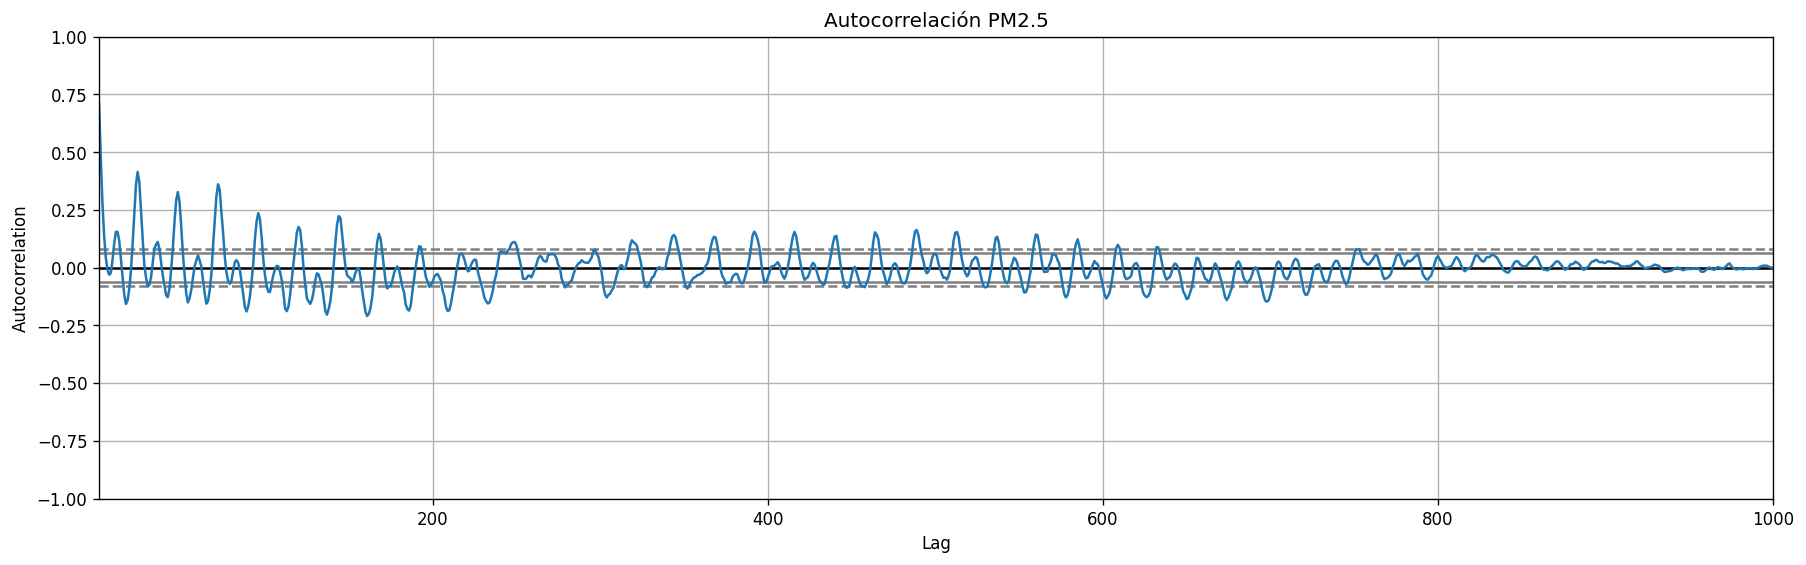

In [ ]:
# Evaluar parámetros
p = [0, 1, 2, 4, 6, 8, 10]  # Valores de p para ARIMA
d = range(0, 3)  # Valores de d para ARIMA
q = range(0, 3)  # Valores de q para ARIMA

# He eliminado el valor 0 porque había un error "error SVG"
df = pollution
df = df[:1000]  # Con esta selección, solo se seleccionan 1.000 registros

# Realizar y mostrar la gráfica de autocorrelación
autocorrelation_plot(df.values)
plt.title('Autocorrelación PM2.5')
plt.show()  # Asegúrate de mostrar la gráfica si no se muestra automáticamente

#evaluate_models(df.values, p, d, q) #il modello migliore ha i parametri ARIMA(1, 0, 0) MSE=3180.066

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

def evaluate_arima_model(X, arima_order):
    # Convertir los datos de entrada a float32 (asumiendo que son numéricos)
    X = X.astype('float32')

    # Dividir los datos en conjuntos de entrenamiento, validación y prueba
    train_size = int(len(X) * 0.70)
    val_size = int(len(X) * 0.15)
    train, val, test = X[0:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    history = [x for x in train]

    # Hacer predicciones para el conjunto de validación
    val_predictions = []
    for t in range(len(val)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        val_predictions.append(yhat)
        history.append(val[t])

    # Hacer predicciones para el conjunto de prueba
    test_predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        test_predictions.append(yhat)
        history.append(test[t])

    # Hacer predicciones para el conjunto de entrenamiento
    train_predictions = []
    for t in range(len(train)):
        model = ARIMA(history[:len(train)+t], order=arima_order)  # Corrigiendo la longitud de la historia
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        train_predictions.append(yhat)

    # Calcular métricas
    val_mse = mean_squared_error(val, val_predictions)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(val, val_predictions)
    val_mape = np.mean(np.abs((val - val_predictions) / val)) * 100

    test_mse = mean_squared_error(test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(test, test_predictions)
    test_mape = np.mean(np.abs((test - test_predictions) / test)) * 100

    train_mse = mean_squared_error(train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(train, train_predictions)
    train_mape = np.mean(np.abs((train - train_predictions) / train)) * 100

    # Imprimir métricas
    print("Conjunto de entrenamiento:")
    print("RMSE:", train_rmse)
    print("MSE:", train_mse)
    print("MAE:", train_mae)
    print("MAPE:", train_mape)

    print("\nConjunto de validación:")
    print("RMSE:", val_rmse)
    print("MSE:", val_mse)
    print("MAE:", val_mae)
    print("MAPE:", val_mape)

    print("\nConjunto de prueba:")
    print("RMSE:", test_rmse)
    print("MSE:", test_mse)
    print("MAE:", test_mae)
    print("MAPE:", test_mape)

# Asumiendo que 'df' contiene una sola columna numérica
# Extraer la columna numérica como un array de NumPy
numerical_data = df['PM2.5'].values  # Reemplaza 'PM2.5' por el nombre real de la columna

evaluate_arima_model(numerical_data, (1, 0, 0))

Conjunto de entrenamiento:
RMSE: 14.931489731023289
MSE: 222.94938558765395
MAE: 12.365052065313181
MAPE: 42.251415001623336

Conjunto de validación:
RMSE: 9.09718707376971
MSE: 82.75881265516271
MAE: 7.055894095836743
MAPE: 18.143375143476575

Conjunto de prueba:
RMSE: 7.652784485955989
MSE: 58.56511038848867
MAE: 5.807857993491482
MAPE: 19.672348584280467


In [ ]:
# evaluate parameters
p = [0, 1, 2, 4, 6, 8, 10]
d = range(0, 3)
q = range(0, 3)

#I have eliminated 0 value because there was an error "SVG  error"
df = pollution
df = df[:1000]
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

#evaluate_models(df, p, d, q) #ARIMA(1, 0, 0)

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def fit_arima_and_predict(train, val, test, order):
    # Ajustar el modelo ARIMA al conjunto de entrenamiento
    history = [x for x in train]
    model = ARIMA(history, order=order)
    model_fit = model.fit()

    # Predicciones en el conjunto de entrenamiento
    train_predictions = model_fit.predict(start=1, end=len(train))

    # Extender el historial con el conjunto de validación para la predicción continua
    history.extend(val)
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    val_predictions = model_fit.predict(start=len(train) + 1, end=len(train) + len(val))

    # Extender el historial con el conjunto de prueba para la predicción continua
    history.extend(test)
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    test_predictions = model_fit.predict(start=len(train) + len(val) + 1, end=len(train) + len(val) + len(test))

    return train_predictions, val_predictions, test_predictions

# Ejemplo de uso:
# Assuming 'df' is a NumPy array with a single feature
train_data = df[:700, 0]  # Select all rows up to index 700 and the first (and only) column
val_data = df[700:850, 0]  # Select rows from index 700 to 850 and the first column
test_data = df[850:, 0]  # Select rows from index 850 onwards and the first column

# Orden del modelo ARIMA (p, d, q)
arima_order = (1, 1, 1)

# Obtener predicciones
train_preds, val_preds, test_preds = fit_arima_and_predict(train_data, val_data, test_data, arima_order)

In [ ]:
def plot_predictions(train, val, test, train_preds, val_preds, test_preds):
    # Crear índices de tiempo para cada conjunto
    t_train = range(len(train))
    t_val = range(len(train), len(train) + len(val))
    t_test = range(len(train) + len(val), len(train) + len(val) + len(test))

    plt.figure(figsize=(14, 7))

    # Graficar datos reales
    plt.plot(t_train, train, label='Entrenamiento Real')
    plt.plot(t_val, val, label='Validación Real')
    plt.plot(t_test, test, label='Prueba Real')

    # Graficar predicciones
    plt.plot(t_train, train_preds, label='Predicciones de Entrenamiento', linestyle='--')
    plt.plot(t_val, val_preds, label='Predicciones de Validación', linestyle='--')
    plt.plot(t_test, test_preds, label='Predicciones de Prueba', linestyle='--')

    plt.title('Comparación de los Valores Reales vs. Predicciones')
    plt.xlabel('Tiempo')
    plt.ylabel('PM2.5')
    plt.legend()
    plt.show()

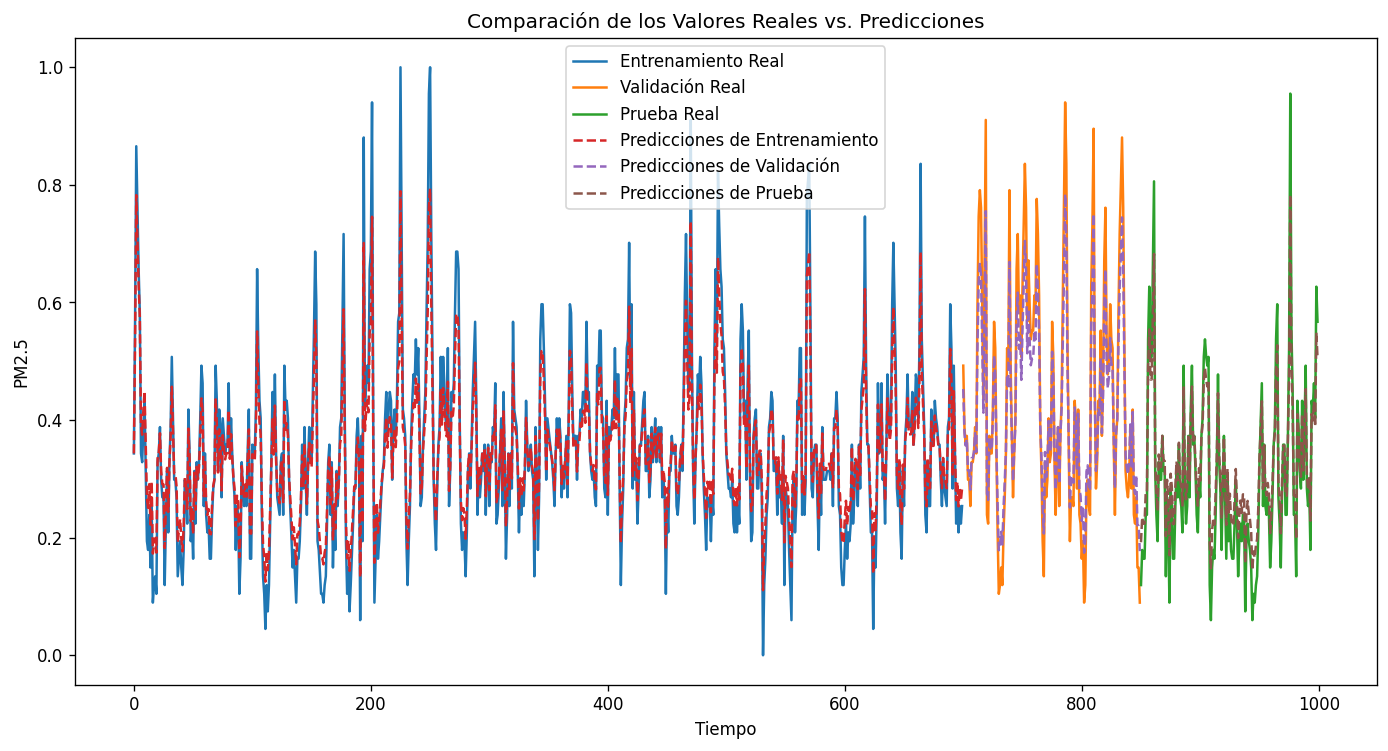

In [ ]:
# Suponiendo que estos datos y predicciones están ya definidos y calculados
plot_predictions(train_data, val_data, test_data, train_preds, val_preds, test_preds)